In [2]:
import polars as ps # type: ignore
import matplotlib.pyplot as plt # type: ignore

In [5]:
df_users = ps.read_csv('../data/users_data.csv')

In [6]:
df_users.head()

id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
i64,i64,i64,i64,i64,str,str,f64,f64,str,str,str,i64,i64
825,53,66,1966,11,"""Female""","""462 Rose Lane""",34.15,-117.76,"""$29278""","""$59696""","""$127613""",787,5
1746,53,68,1966,12,"""Female""","""3606 Federal Boulevard""",40.76,-73.74,"""$37891""","""$77254""","""$191349""",701,5
1718,81,67,1938,11,"""Female""","""766 Third Drive""",34.02,-117.89,"""$22681""","""$33483""","""$196""",698,5
708,63,63,1957,1,"""Female""","""3 Madison Street""",40.71,-73.99,"""$163145""","""$249925""","""$202328""",722,4
1164,43,70,1976,9,"""Male""","""9620 Valley Stream Drive""",37.76,-122.44,"""$53797""","""$109687""","""$183855""",675,1


### Adding a new column retirement_status - Retired or Not Retired

In [7]:
df_users = df_users.with_columns(
    ps.when(ps.col('current_age') > ps.col('retirement_age'))
    .then(ps.lit('Retired'))  # Ensure string is treated as a literal
    .otherwise(ps.lit('Not Retired'))
    .alias('retirement_status')
)
df_users.head()

id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,retirement_status
i64,i64,i64,i64,i64,str,str,f64,f64,str,str,str,i64,i64,str
825,53,66,1966,11,"""Female""","""462 Rose Lane""",34.15,-117.76,"""$29278""","""$59696""","""$127613""",787,5,"""Not Retired"""
1746,53,68,1966,12,"""Female""","""3606 Federal Boulevard""",40.76,-73.74,"""$37891""","""$77254""","""$191349""",701,5,"""Not Retired"""
1718,81,67,1938,11,"""Female""","""766 Third Drive""",34.02,-117.89,"""$22681""","""$33483""","""$196""",698,5,"""Retired"""
708,63,63,1957,1,"""Female""","""3 Madison Street""",40.71,-73.99,"""$163145""","""$249925""","""$202328""",722,4,"""Not Retired"""
1164,43,70,1976,9,"""Male""","""9620 Valley Stream Drive""",37.76,-122.44,"""$53797""","""$109687""","""$183855""",675,1,"""Not Retired"""


In [8]:
df_users.describe()

statistic,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,retirement_status
str,f64,f64,f64,f64,f64,str,str,f64,f64,str,str,str,f64,f64,str
"""count""",2000.0,2000.0,2000.0,2000.0,2000.0,"""2000""","""2000""",2000.0,2000.0,"""2000""","""2000""","""2000""",2000.0,2000.0,"""2000"""
"""null_count""",0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,0.0,"""0""","""0""","""0""",0.0,0.0,"""0"""
"""mean""",999.5,45.3915,66.2375,1973.803,6.439,null,null,37.389225,-91.554765,null,null,null,709.7345,3.073,null
"""std""",577.494589,18.414092,3.628867,18.421234,3.565338,null,null,5.114324,16.283293,null,null,null,67.221949,1.637379,null
"""min""",0.0,18.0,50.0,1918.0,1.0,"""Female""","""0 Elm Street""",20.88,-159.41,"""$0""","""$1""","""$0""",480.0,1.0,"""Not Retired"""
"""25%""",500.0,30.0,65.0,1961.0,3.0,null,null,33.84,-97.39,null,null,null,681.0,2.0,null
"""50%""",1000.0,44.0,66.0,1975.0,7.0,null,null,38.27,-86.44,null,null,null,712.0,3.0,null
"""75%""",1499.0,58.0,68.0,1989.0,10.0,null,null,41.2,-80.13,null,null,null,753.0,4.0,null
"""max""",1999.0,101.0,79.0,2002.0,12.0,"""Male""","""9995 Pine Avenue""",61.2,-68.67,"""$9995""","""$99883""","""$99840""",850.0,9.0,"""Retired"""


In [9]:
# Select string columns
string_columns = df_users.select(ps.selectors.string()).columns

# Iterate over string columns and print the number of unique values
for col in string_columns:
    unique_count = df_users[col].n_unique()
    print(f"{col}: {unique_count} unique values")

gender: 2 unique values
address: 1999 unique values
per_capita_income: 1754 unique values
yearly_income: 1948 unique values
total_debt: 1880 unique values
retirement_status: 2 unique values


In [10]:
df_users.is_duplicated().sum()

0

### Histograms

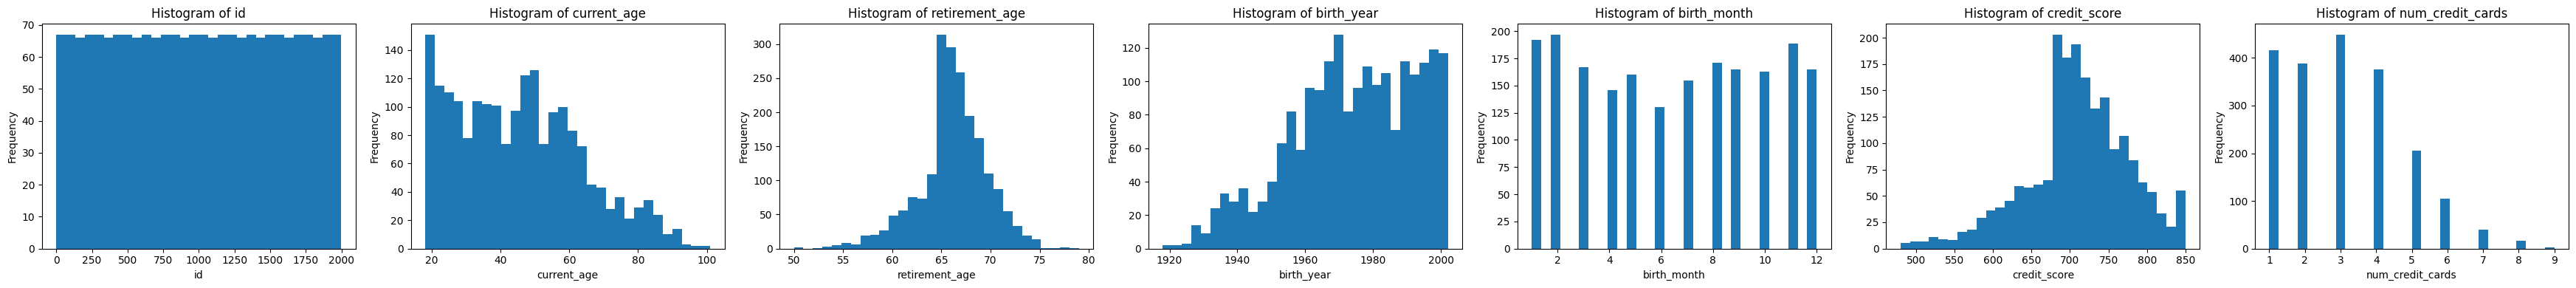

In [11]:
# Select integer columns
int_columns = df_users.select(ps.col(ps.Int64)).columns

# Determine the number of plots
num_plots = len(int_columns)

# Create subplots: 1 row, num_plots columns
fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(5 * num_plots, 4))

# If there's only one plot, axes is not an array
if num_plots == 1:
    axes = [axes]

# Plot histograms for integer columns
for ax, col in zip(axes, int_columns):
    ax.hist(df_users[col].to_numpy(), bins=30)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Boxplots

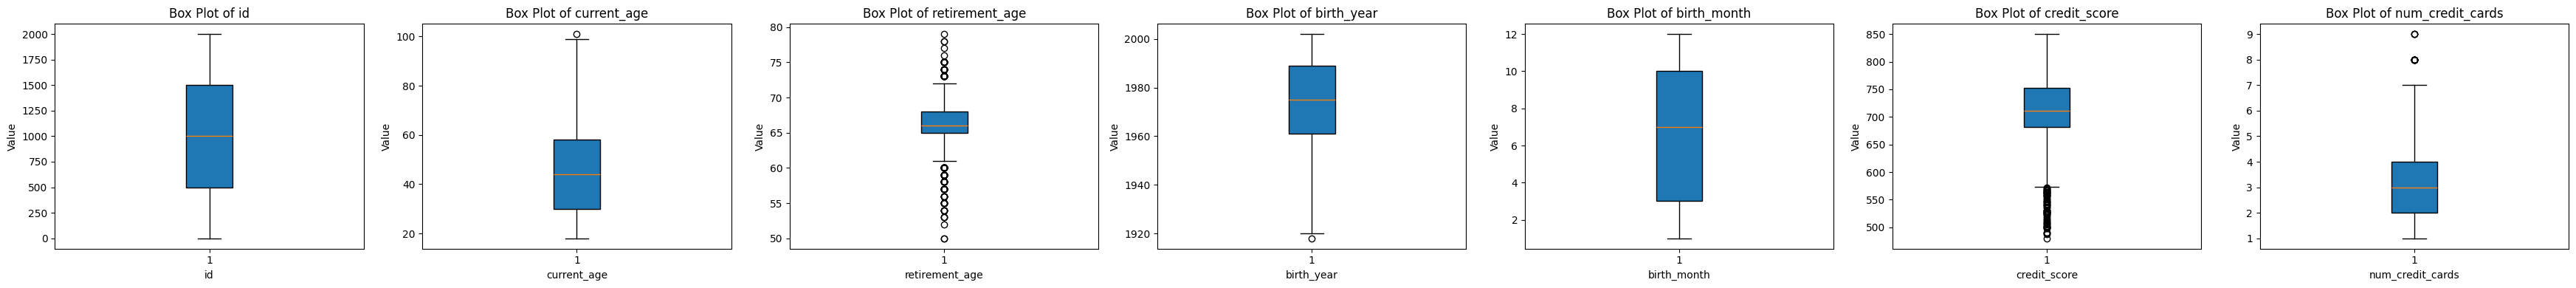

In [12]:
# Create subplots: one row, multiple columns
fig, axes = plt.subplots(nrows=1, ncols=len(int_columns), figsize=(5 * len(int_columns), 4))

# If there's only one plot, axes is not an array
if len(int_columns) == 1:
    axes = [axes]

# Plot box plots for integer columns
for ax, col in zip(axes, int_columns):
    ax.boxplot(df_users[col].to_numpy(), vert=True, patch_artist=True)
    ax.set_title(f'Box Plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Value')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()